# Netflix Movies and TV Shows

### Datasource : https://www.kaggle.com/shivamb/netflix-shows

### Data Description 
-----
show_id - Unique ID for every Movie/TV Show. <br>
type - Type of Content: Movie/TV Show.<br>
title - Name of the Movie/TV Show.<br>
director - Name of the Director of the Movie/TV Show.<br>
cast - Actors involved in the Movie/TV Show.<br>
country - Name of the Countries where the Movie/TV Show is produced.<br>
date_added - The Date in which the Movie/TV Show was added on Netflix.<br>
release_year - Original Release Year of the Movie/TV Show.<br>
rating - Rating of the Movie/TV Show.<br>
duration - Total Duration of the Movie (in Minutes) or TV Show (in Seasons).<br>
listed_in - Genre of the Movie/TV Show.<br>
description - Summary of the Movie/TV Show.

### Importing libraries

In [231]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

### Loading data and Checking Dataset

In [232]:
netflix = pd.read_csv("netflix_titles.csv")
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Exploring Data Analysis

In [233]:
netflix.shape

(8807, 12)

In [234]:
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [235]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [236]:
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

It can be seen that director, cast, country, dated_added, rating and duration columns have null values 

In [237]:
netflix.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [238]:
netflix.show_id.nunique()

8807

There are no duplication of show_id column

From the data that I have read till now, I am looking into type, country and rating columns. Since, these data are very interesting to be explored and wrangled. 

In [239]:
netflix.type.unique()

array(['Movie', 'TV Show'], dtype=object)

In [240]:
netflix.type.value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [241]:
netflix.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [242]:
netflix.country.nunique()

748

In [243]:
netflix.country.unique()

array(['United States', 'South Africa', nan, 'India',
       'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia',
       'United Kingdom', 'Germany, Czech Republic', 'Mexico', 'Turkey',
       'Australia', 'United States, India, France', 'Finland',
       'China, Canada, United States',
       'South Africa, United States, Japan', 'Nigeria', 'Japan',
       'Spain, United States', 'France', 'Belgium',
       'United Kingdom, United States', 'United States, United Kingdom',
       'France, United States', 'South Korea', 'Spain',
       'United States, Singapore', 'United Kingdom, Australia, France',
       'United Kingdom, Australia, France, United States',
       'United States, Canada', 'Germany, United States',
       'South Africa, United States', 'United States, Mexico',
       'United States, Italy, France, Japan',
       'United States, Italy, Romania, United Kingdom',
       'Australia, United States', 'Argentina, Venezuela',
       'United States, United Kin

In [244]:
netflix.country.sample(10,random_state= 1) 

2894                                           Argentina
2161                                             Uruguay
6363                              United Kingdom, Russia
2575                                       United States
2698                                               Japan
7223    United Kingdom, Norway, Denmark, Germany, Sweden
5759                                       United States
863                                        United States
8690                                                 NaN
3625                                              Mexico
Name: country, dtype: object

From the sample in country column you can see that there are columns having more than one country in themself. Therefore, we need to deal with it.

In [245]:
print(netflix.country.iloc[7223])
netflix.country.value_counts()

United Kingdom, Norway, Denmark, Germany, Sweden


United States                                    2818
India                                             972
United Kingdom                                    419
Japan                                             245
South Korea                                       199
                                                 ... 
Brazil, France, Germany                             1
United States, United Kingdom, India                1
India, Mexico                                       1
Czech Republic, United Kingdom, United States       1
United States, Canada, Japan, Panama                1
Name: country, Length: 748, dtype: int64

Trying to split countries into individual columns 

In [246]:
country = netflix.country.str.split(", ", expand= True)
print(country.sample(10 , random_state= 1 ))

                  0       1        2        3       4     5     6     7   \
2894       Argentina    None     None     None    None  None  None  None   
2161         Uruguay    None     None     None    None  None  None  None   
6363  United Kingdom  Russia     None     None    None  None  None  None   
2575   United States    None     None     None    None  None  None  None   
2698           Japan    None     None     None    None  None  None  None   
7223  United Kingdom  Norway  Denmark  Germany  Sweden  None  None  None   
5759   United States    None     None     None    None  None  None  None   
863    United States    None     None     None    None  None  None  None   
8690             NaN     NaN      NaN      NaN     NaN   NaN   NaN   NaN   
3625          Mexico    None     None     None    None  None  None  None   

        8     9     10    11  
2894  None  None  None  None  
2161  None  None  None  None  
6363  None  None  None  None  
2575  None  None  None  None  
2698  No

Merging with main columns

In [247]:
country_n = pd.concat([netflix , country], axis = 1)
country_n

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,2,3,4,5,6,7,8,9,10,11
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,None,None,None,None,None,None,None,None,None,None
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,None,None,None,None,None,None,None,None,None,None
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,...,None,None,None,None,None,None,None,None,None,None
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,...,None,None,None,None,None,None,None,None,None,None
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,...,None,None,None,None,None,None,None,None,None,None


In [248]:
country_n = country_n.melt(id_vars = ["type"] , value_vars = range(12) , value_name= "country")

<ipython-input-248-c8c5a972a000>:1: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  country_n = country_n.melt(id_vars = ["type"] , value_vars = range(12) , value_name= "country")


In [249]:
country_n.country.value_counts()

United States     3689
India             1046
United Kingdom     804
Canada             445
France             393
                  ... 
Nicaragua            1
Albania              1
Vatican City         1
Cambodia,            1
Sudan                1
Name: country, Length: 127, dtype: int64

You can see after handling country column, there are much more number of coutries than before.

In [250]:
country_n = country_n[country_n.country.notna()]

In [251]:
country_n

,type,variable,country
0,Movie,0,United States
1,TV Show,0,South Africa
4,TV Show,0,India
7,Movie,0,United States
8,TV Show,0,United Kingdom
...,...,...,...
78859,Movie,8,Germany
85496,Movie,9,Sweden
87666,Movie,9,Netherlands
94303,Movie,10,United States


### Data Visualization

##### Let's see Release_year

<AxesSubplot:ylabel='Count'>

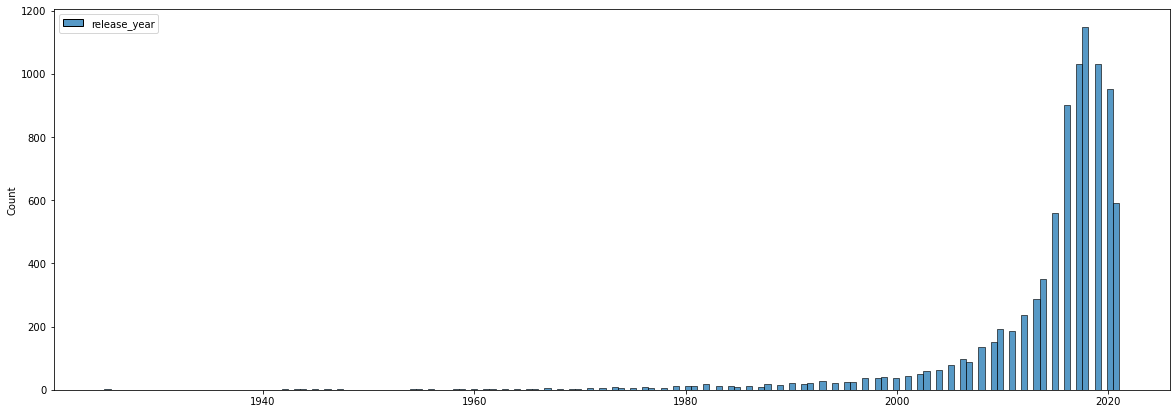

In [252]:
plt.figure(figsize= (20,7))
sns.histplot(netflix)

C:\Users\booma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='type', ylabel='count'>

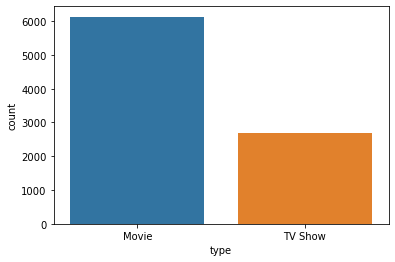

In [253]:
sns.countplot(netflix.type)

The countplot show that people produce Movie around twice as well as TV Show 

##### Let's see the relations between Type and Rating of netflix

In [254]:
type_Movie = netflix.loc[netflix.type.isin(["Movie"])]
print(type_Movie)

     show_id   type                             title  \
0         s1  Movie              Dick Johnson Is Dead   
6         s7  Movie  My Little Pony: A New Generation   
7         s8  Movie                           Sankofa   
9        s10  Movie                      The Starling   
12       s13  Movie                      Je Suis Karl   
...      ...    ...                               ...   
8801   s8802  Movie                           Zinzana   
8802   s8803  Movie                            Zodiac   
8804   s8805  Movie                        Zombieland   
8805   s8806  Movie                              Zoom   
8806   s8807  Movie                            Zubaan   

                           director  \
0                   Kirsten Johnson   
6     Robert Cullen, José Luis Ucha   
7                      Haile Gerima   
9                    Theodore Melfi   
12              Christian Schwochow   
...                             ...   
8801                Majid Al Ansari   
880

In [255]:
type_Movie.rating.value_counts()

TV-MA       2062
TV-14       1427
R            797
TV-PG        540
PG-13        490
PG           287
TV-Y7        139
TV-Y         131
TV-G         126
NR            75
G             41
TV-Y7-FV       5
UR             3
NC-17          3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

C:\Users\booma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rating', ylabel='count'>

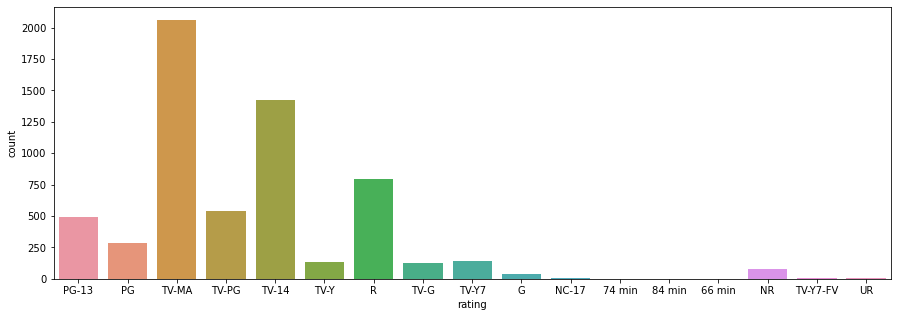

In [256]:
plt.figure(figsize= (15,5))
sns.countplot(type_Movie.rating)

From the countplot, In movie type TV-MA is the most popular rating and  TV-14, R, TV-PG respectively. 

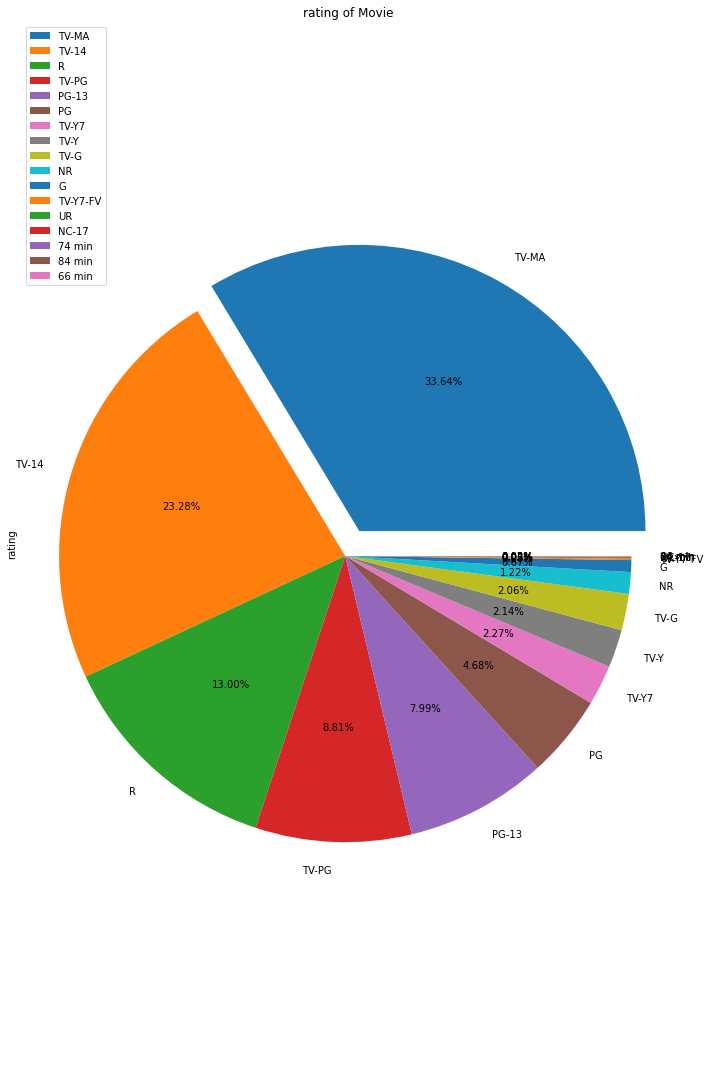

In [257]:
plt.figure(figsize=(10,15))
type_Movie["rating"].value_counts().plot(kind="pie", title = "rating of Movie", legend = True , explode = (0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0) , autopct='%1.2f%%' )
plt.axis('equal')
plt.tight_layout()

Now, pieplot are more visual than countplot and it tell us percentages that TV-MA is the highest one and the others following. 

In [258]:
type_TV_Show = netflix.loc[netflix.type.isin(["TV Show"])]
print(type_TV_Show)

     show_id     type                  title         director  \
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
5         s6  TV Show          Midnight Mass    Mike Flanagan   
...      ...      ...                    ...              ...   
8795   s8796  TV Show        Yu-Gi-Oh! Arc-V              NaN   
8796   s8797  TV Show             Yunus Emre              NaN   
8797   s8798  TV Show              Zak Storm              NaN   
8800   s8801  TV Show     Zindagi Gulzar Hai              NaN   
8803   s8804  TV Show            Zombie Dumb              NaN   

                                                   cast  \
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   
2     Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...   
3                                         

In [259]:
type_TV_Show["rating"].value_counts()

TV-MA       1145
TV-14        733
TV-PG        323
TV-Y7        195
TV-Y         176
TV-G          94
NR             5
R              2
TV-Y7-FV       1
Name: rating, dtype: int64

C:\Users\booma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rating', ylabel='count'>

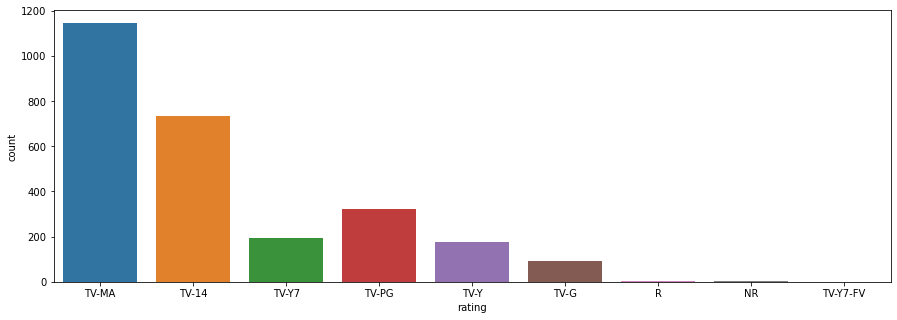

In [260]:
plt.figure(figsize= (15,5))
sns.countplot(type_TV_Show.rating)

From the countplot, In TV Show type TV-MA is still the most popular rating and  TV-14, TV-PG respectively. However, R rating is very low compare to R in movie type.

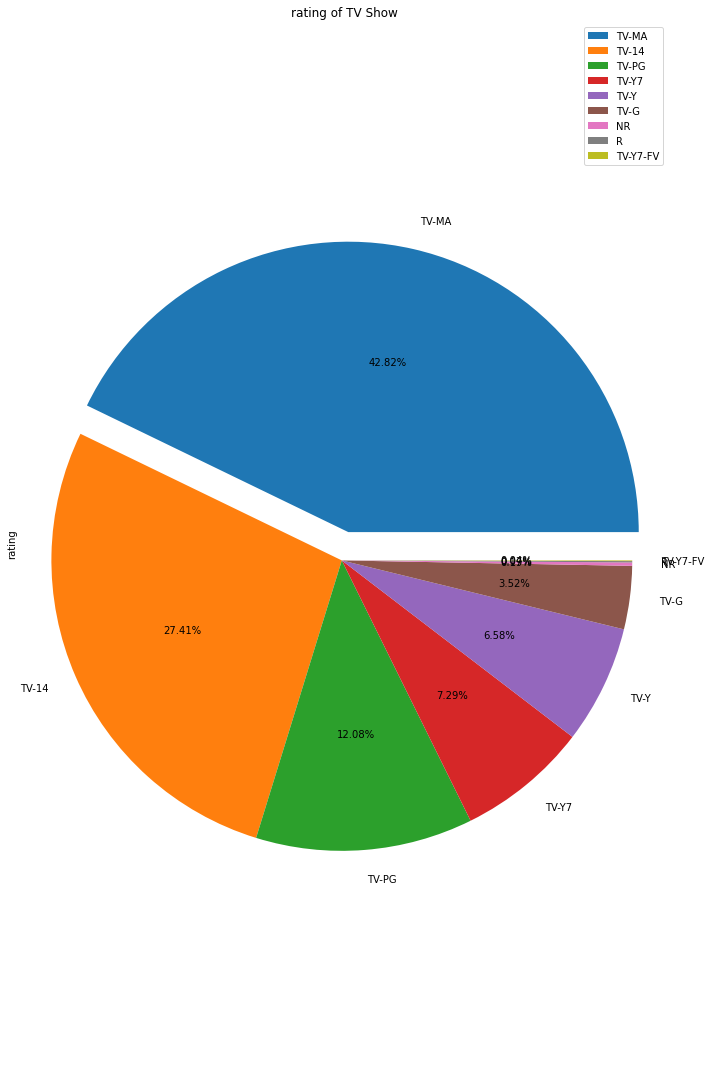

In [261]:
plt.figure(figsize=(10,15))
type_TV_Show["rating"].value_counts().plot(kind="pie", title = "rating of TV Show", legend = True , explode = (0.1,0,0,0,0,0,0,0,0) , autopct='%1.2f%%' )
plt.axis('equal')
plt.tight_layout()

With pieplot, you can see that it is easy to read the data by percentages

##### Let's see realtions between Type and Country of netflix

United States     3689
India             1046
United Kingdom     804
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Mexico             169
China              162
Australia          160
Egypt              117
Turkey             113
Hong Kong          105
Nigeria            103
Italy              100
Brazil              97
Argentina           91
Belgium             90
Indonesia           90
Taiwan              89
Philippines         83
Thailand            70
Name: country, dtype: int64


<AxesSubplot:xlabel='country'>

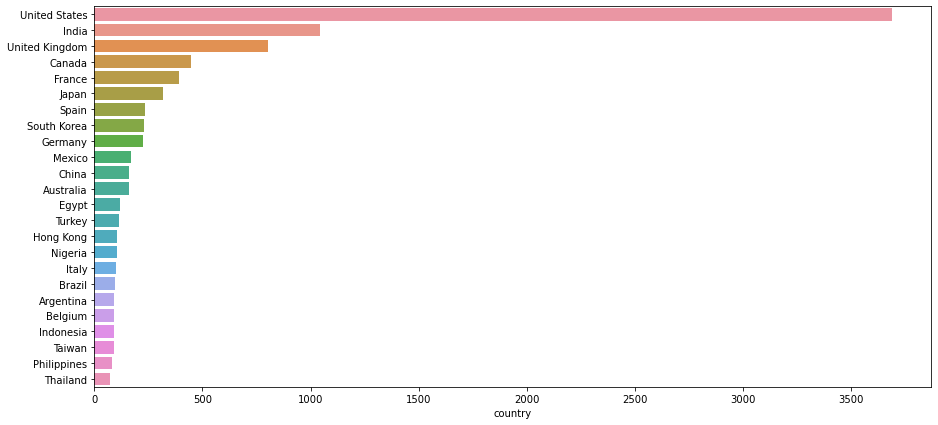

In [262]:
plt.figure(figsize = (15, 7))
country_s = country_n.country.value_counts()[:24]
print(country_s)
sns.barplot(x= country_s , y = country_s.index)

United States, India, United Kingdom, Canada, France is the top five where United States is the highest one producing Movie and TV Show in netflix.

In [263]:
country_n.type.unique()

array(['Movie', 'TV Show'], dtype=object)

In [264]:
country_n.type.isnull().sum()
print(country_n.country)

0          United States
1           South Africa
4                  India
7          United States
8         United Kingdom
               ...      
78859            Germany
85496             Sweden
87666        Netherlands
94303      United States
103110           Uruguay
Name: country, Length: 10014, dtype: object


In [265]:
st = [x for x in country_n.country.value_counts()[:30].index]
print(st)
hist = {}
histb = {}
for i in range(len(country_n.country.value_counts()[:30])):
    hist[st[i]] = country_n.country.value_counts()[i]
    histb[country_n.country.value_counts()[i]] = st[i]
print(hist)
country_n['mapC'] = country_n.country.map(hist)
country_n= country_n.sort_values(by='mapC',ascending=False)
country_n = country_n.drop(columns='mapC')
country_n = country_n.loc[country_n.country.isin(st)]

country_n

['United States', 'India', 'United Kingdom', 'Canada', 'France', 'Japan', 'Spain', 'South Korea', 'Germany', 'Mexico', 'China', 'Australia', 'Egypt', 'Turkey', 'Hong Kong', 'Nigeria', 'Italy', 'Brazil', 'Argentina', 'Belgium', 'Indonesia', 'Taiwan', 'Philippines', 'Thailand', 'South Africa', 'Colombia', 'Netherlands', 'Denmark', 'Ireland', 'Sweden']
{'United States': 3689, 'India': 1046, 'United Kingdom': 804, 'Canada': 445, 'France': 393, 'Japan': 318, 'Spain': 232, 'South Korea': 231, 'Germany': 226, 'Mexico': 169, 'China': 162, 'Australia': 160, 'Egypt': 117, 'Turkey': 113, 'Hong Kong': 105, 'Nigeria': 103, 'Italy': 100, 'Brazil': 97, 'Argentina': 91, 'Belgium': 90, 'Indonesia': 90, 'Taiwan': 89, 'Philippines': 83, 'Thailand': 70, 'South Africa': 62, 'Colombia': 52, 'Netherlands': 50, 'Denmark': 48, 'Ireland': 46, 'Sweden': 42}


,type,variable,country
0,Movie,0,United States
5913,Movie,0,United States
5937,Movie,0,United States
5936,Movie,0,United States
5934,Movie,0,United States
...,...,...,...
13019,Movie,1,Sweden
617,TV Show,0,Sweden
38770,Movie,4,Sweden
15252,Movie,1,Sweden


<AxesSubplot:xlabel='country', ylabel='Count'>

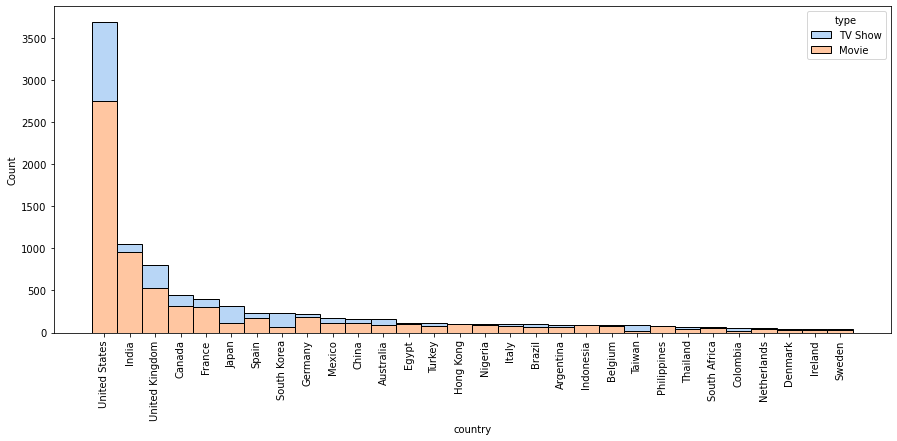

In [266]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
sns.histplot(data= country_n , multiple="stack",
             x = "country" ,kde=False,
             palette="pastel", hue="type", hue_order=['TV Show',"Movie"],
             element="bars", legend=True)


From the above, United States is the country where produces the most Movie and TV Show in netflix, which Movie Type is the main that most countries intend to produce rather than the TV Show type. 

##### Word cloud in description of netflix

In [267]:
k=""
data = netflix.description.values
print(data)
for x in data:
   k += x

['As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable.'
 'After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth.'
 'To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robbers are pulled into a violent and deadly turf war.'
 ...
 'Looking to survive in a world taken over by zombies, a dorky college student teams with an urban roughneck and a pair of grifter sisters.'
 'Dragged from civilian life, a former superhero must train a new crop of youthful saviors when the military preps for an attack by a familiar villain.'
 "A scrappy but poor boy worms his way into a tycoon's dysfunctional family, while facing his fear of music and the truth about his past."]


(-0.5, 399.5, 199.5, -0.5)

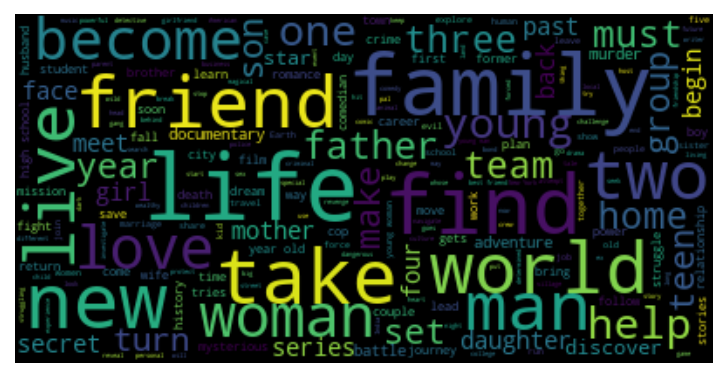

In [268]:
wc = WordCloud()
wc.generate(k)
plt.figure(dpi=150)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

The more frequent word is used, the bigger it is. That means the story of TV show and Movie are about family, world, life, friend and etc. 

------
### Thank you for reading, this is only my miniprojct for practicing and improving myself about data science.